In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import r2_score

df = pd.read_csv('day.csv')

Más informacióm del dataset 

El objetivo es predecir cuantas vicicletas se van a rentar

https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset


Quita las variables de casual, registered, instant, fecha, mes, año de tu entrenamiento

Hay varias categoricas, cuales son? coviertelas e one hot encoding 

Crea variables dummy 

In [2]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [4]:
df = df.drop(columns = ['casual','registered', 'instant', 'dteday', 'mnth', 'yr' ])

In [5]:
target = 'cnt'
y = df[target]

X = df.copy()
X = X.drop(target, axis = 1)
X = pd.get_dummies(X, columns = ['season', 'weathersit', 'weekday'])

X.head()

,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.344167,0.363625,0.805833,0.160446,1,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,0.363478,0.353739,0.696087,0.248539,1,0,0,0,0,1,0,1,0,0,0,0,0,0
2,0,1,0.196364,0.189405,0.437273,0.248309,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0,1,0.200000,0.212122,0.590435,0.160296,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,1,0.226957,0.229270,0.436957,0.186900,1,0,0,0,1,0,0,0,0,0,1,0,0,0


## Análisis Bivariado: 

### Variable temp

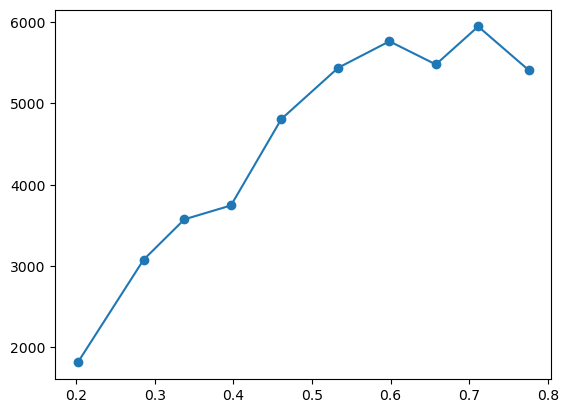

In [6]:
df['temp_bin'] = pd.qcut(df['temp'] , q = 10, labels = False) + 1
grouped_temp = df.groupby('temp_bin').mean()
plt.plot(grouped_temp.temp.values, grouped_temp.cnt.values, marker = "o")

### Variable atemp

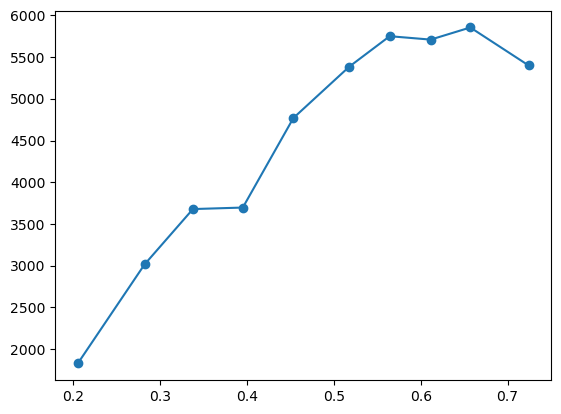

In [7]:
df['atemp_bin'] = pd.qcut(df['atemp'] , q = 10, labels = False) + 1
grouped_atemp = df.groupby('atemp_bin').mean()
plt.plot(grouped_atemp.atemp.values, grouped_atemp.cnt.values, marker = "o")

### Variable hum

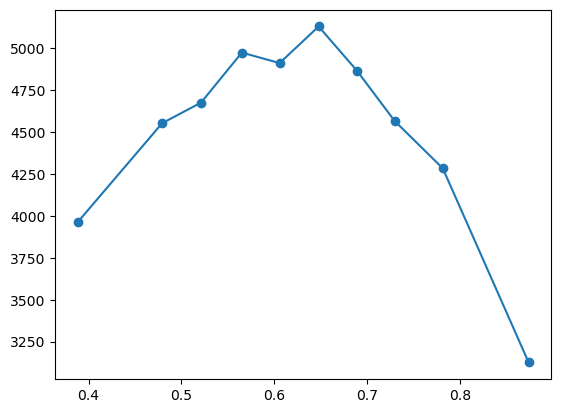

In [8]:
df['hum_bin'] = pd.qcut(df['hum'] , q = 10, labels = False) + 1
grouped_hum = df.groupby('hum_bin').mean()
plt.plot(grouped_hum.hum.values, grouped_hum.cnt.values, marker = "o")

### Variable windspeed

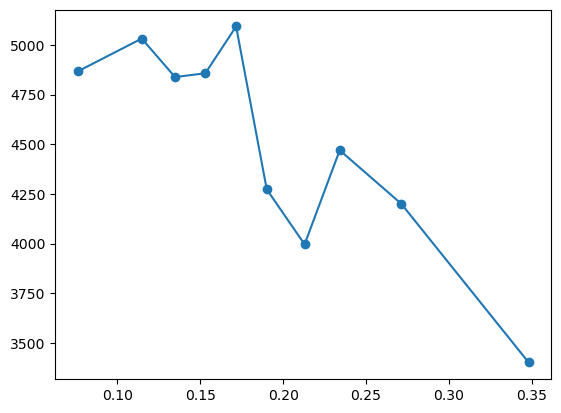

In [9]:
df['windspeed_bin'] = pd.qcut(df['windspeed'] , q = 10, labels = False) + 1
grouped_windspeed = df.groupby('windspeed_bin').mean()
plt.plot(grouped_windspeed.windspeed.values, grouped_windspeed.cnt.values, marker = "o")

### Análisis:

- Con las cuartro variables anteriores, podemos ver como las primeras dos variables **(temp y atemp)** tienen gráficas muy similares y con una tendencia a la alza. Por otro lado, la tercera variable **(hum)** se comporta similar a una parábola, con un incremento inicial que es seguido por una caída gradual. Por último, la variable de **windseep** demuestra claramente una tendencia a la baja con caídas fuertes y pronunciada. 

## Regresión lineal múltiple

In [10]:
model_todo = linear_model.LinearRegression().fit(X,y)
predicciones_todo = model_todo.predict(X)

r2_score(y_pred = predicciones_todo, y_true = y)

0.5635731035010111

In [11]:
coeficientes = pd.DataFrame({
    'names':X.keys(),
    'coeficientes': model_todo.coef_
})

coeficientes

,names,coeficientes
0,holiday,5.544720e+16
1,workingday,5.544720e+16
2,temp,5.581921e+03
3,atemp,6.823063e+02
4,hum,-2.598812e+03
5,windspeed,-3.350681e+03
6,season_1,-4.671706e+15
7,season_2,-4.671706e+15
8,season_3,-4.671706e+15
9,season_4,-4.671706e+15


### Análisis:

- Con los cálculos anteriores, podemos ver que al hacer una regresión lineal con todas las variables posibles se obtiene un R2 de 0.5636. Este número nos indica que el modelo establecido explica aproximadamente el 56.36% de la variación de los datos. En este caso, para obtener un modelo con mayor precisión se debe buscar un R2 más cercano a 1. Se puede mejorar el modelo a través de modificaciones matemáticas, utilizando herramientas como Ridge, entre otras cosas. 

## Regresión lineal modificada

In [12]:
X['hum2'] = X['hum']**2
X['temp2'] = X['temp']**2
X['atemp2'] = X['atemp']**2
X['windspeed2'] = X['windspeed']**2

X.head()

,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,hum2,temp2,atemp2,windspeed2
0,0,0,0.344167,0.363625,0.805833,0.160446,1,0,0,0,...,0,0,0,0,0,1,0.649367,0.118451,0.132223,0.025743
1,0,0,0.363478,0.353739,0.696087,0.248539,1,0,0,0,...,0,0,0,0,0,0,0.484537,0.132116,0.125131,0.061772
2,0,1,0.196364,0.189405,0.437273,0.248309,1,0,0,0,...,1,0,0,0,0,0,0.191208,0.038559,0.035874,0.061657
3,0,1,0.200000,0.212122,0.590435,0.160296,1,0,0,0,...,0,1,0,0,0,0,0.348613,0.040000,0.044996,0.025695
4,0,1,0.226957,0.229270,0.436957,0.186900,1,0,0,0,...,0,0,1,0,0,0,0.190931,0.051509,0.052565,0.034932


In [13]:
model_todo = linear_model.LinearRegression().fit(X,y)
predicciones_todo = model_todo.predict(X)

r2_score(y_pred = predicciones_todo, y_true = y)

0.6296237280043964

### Análisis:

- Con lo anterior, se pueden apreciar las modificaciones que se hicieron para poder mejorar la precisión del modelo. En total se hicieron cuatro modificaciones, la primera siendo que se elevó al cuadrado la variable de **hum**. Esto se hizo ya que, en el análisis bivariado, pudimos ver como se tenía una gráfica parabólica. El término cuadrático permiíte que se capture de mejor manera la curva de los datos. Esto mismo se realizó con las variables de **temp**, **atemp** y **windspeed**. Aunque estas gráficas no parecían ser parabólicas, sus caídas indícan que se puede llegar a crear cierta curvatura con los datos, lo cuál llevó a la modificación de los términos haciendolos cuadráticos. Con estos cambios, se logró aumentar el R2 a un 62.96%

## Visualización

In [14]:
calibracion = pd.DataFrame({
    'predicciones': predicciones_todo,
    'real': y
})

In [15]:
calibracion['bins'] = pd.qcut(calibracion['predicciones'] , q = 10, labels = False) + 1

In [16]:
grouped_calibracion = calibracion.groupby('bins').mean()

In [17]:
grouped_calibracion['error'] = (grouped_calibracion.predicciones - grouped_calibracion.real) / grouped_calibracion.predicciones

In [18]:
grouped_calibracion

,predicciones,real,error
bins,,,
1,1273.428389,1570.783784,-0.233508
2,2754.252400,2488.383562,0.096530
3,3551.845739,3287.821918,0.074334
4,4236.913520,4174.095890,0.014826
5,4739.904723,4735.917808,0.000841
6,5112.711910,4943.205479,0.033154
7,5429.674976,5593.794521,-0.030226
8,5704.769585,5707.849315,-0.000540
9,5938.975264,5992.068493,-0.008940


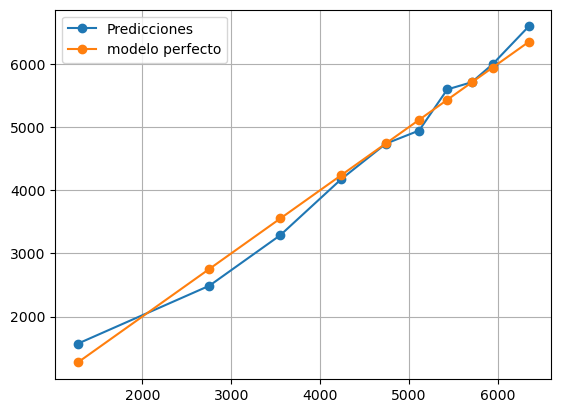

In [19]:
plt.plot(grouped_calibracion.predicciones.values,
         grouped_calibracion.real.values, marker = "o", label="Predicciones")

plt.plot(grouped_calibracion.predicciones.values,
         grouped_calibracion.predicciones.values, marker = "o", label="modelo perfecto")

plt.legend()
plt.grid()

### Análisis:
- En conclusión, este nuevo modelo modificado nos muestra una predicción más precisa y cercana a la realidad. Podemos ver como el mayor porcentaje de error se presenta en el primer bin y se va ajustando conforme avanza la gráfica. Con la gráfica, se puede ver claramente la cercanía que existe entre los datos reales, representados por una línea azul, y el modelo creado, que se visualiza con la línea naranja. El modelo presentado fue el modelo con mayor precisión que encontré, y se logró a través de modificaciones matemáticas y prueba y error. 